# Data Science Salary Prediction 

### Import Useful Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression 

### Read the data

In [103]:
data=pd.read_csv('/Users/joshuaodugbemi/Downloads/Datasets/datascience_salaries.csv',index_col=False)

### Expository data analysis and visualizations

In [104]:
data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [105]:
data.tail()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
1166,2243,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,2249,ML Ops,Full Time,Senior,Boston,USD,115000
1168,2250,ML Ops,Full Time,Senior,Delhi,USD,76000
1169,2255,ML Ops,Full Time,Senior,San Francisco,USD,68000
1170,2259,ML Ops,Internship,Senior,New York City,USD,135000


In [106]:
#Data consisit of 7 columns and 1171 rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [107]:
data.describe()

,Unnamed: 0,salary
count,1171.000000,1171.000000
mean,931.620837,64836.037575
std,647.445266,32551.767046
min,0.000000,30000.000000
25%,364.500000,45000.000000
50%,815.000000,63000.000000
75%,1504.500000,68000.000000
max,2259.000000,228000.000000


In [108]:
# Checking for null values
data.isnull().sum()

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

<Axes: title={'center': 'Missing Values'}>

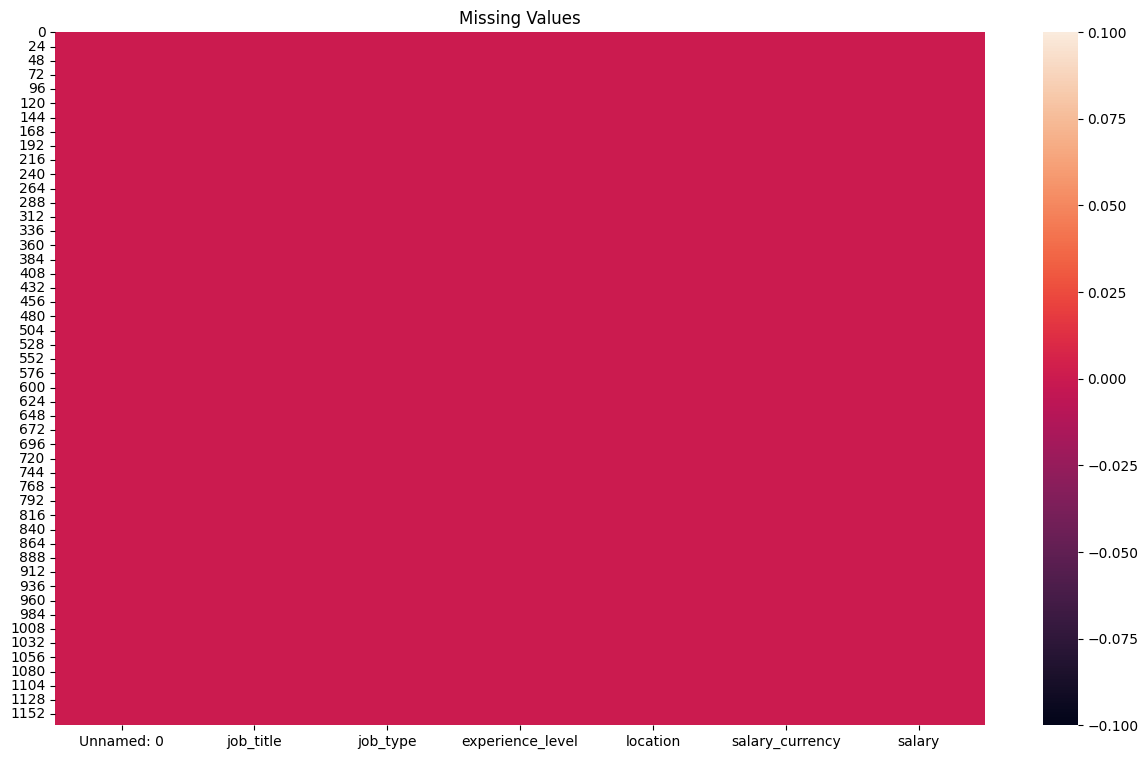

In [109]:
plt.figure(figsize=(15,9))
plt.title('Missing Values')
sns.heatmap(data.isnull())

In [110]:
data.columns

Index(['Unnamed: 0', 'job_title', 'job_type', 'experience_level', 'location',
       'salary_currency', 'salary'],
      dtype='object')

#### Checking categorical variables

In [111]:
data['job_title'].value_counts()

Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: job_title, dtype: int64

In [112]:
data['job_type'].value_counts()

Full Time     1136
Internship      35
Name: job_type, dtype: int64

In [113]:
data['experience_level'].value_counts()

Senior       727
Mid          305
Entry        126
Executive     13
Name: experience_level, dtype: int64

In [114]:
data['location'].value_counts()

London                    75
Remote                    50
San Francisco             43
Bengaluru                 34
Paris                     33
                          ..
Bogota                     1
Kampala                    1
Kirkland                   1
Riga                       1
New York City / Remote     1
Name: location, Length: 320, dtype: int64

## A new column created from location column to distinguish between remote and onsite

In [115]:
data['on-site']=data['location']!= 'Remote'

In [116]:
data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,on-site
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,True
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,True
2,3,Data scientist,Full Time,Senior,London,USD,68000,True
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,True
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,True


In [118]:
data['on-site']=data['on-site'].astype(int)

In [119]:
data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,on-site
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,1
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,1
2,3,Data scientist,Full Time,Senior,London,USD,68000,1
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,1
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,1


In [79]:
data['on-site'].value_counts()

1    1121
0      50
Name: on-site, dtype: int64

## Convert GBP and EUR to USD

In [80]:
data['salary_currency'].value_counts()

USD    1157
EUR       9
GBP       5
Name: salary_currency, dtype: int64

In [81]:
data[data['salary_currency']=='EUR']

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,on-site
63,84,Data scientist,Full Time,Senior,Madrid,EUR,36000,1
94,123,Data scientist,Full Time,Mid,Paris,EUR,50000,1
149,188,Data scientist,Full Time,Senior,Madrid,EUR,36000,1
182,226,Data scientist,Full Time,Mid,Berlin,EUR,58000,1
238,295,Data scientist,Full Time,Senior,Madrid,EUR,36000,1
354,444,Data scientist,Full Time,Senior,Madrid,EUR,36000,1
421,537,Data analyst,Full Time,Senior,Madrid,EUR,38000,1
762,1200,Big data,Full Time,Senior,Remote,EUR,65000,0
1008,1800,Machine learning,Full Time,Senior,Paris | Remote,EUR,70000,1


In [82]:
data['salary'][data['salary_currency']=='EUR']=data['salary'][data['salary_currency']=='EUR']*1.10

/var/folders/4v/14_p203d1_987b4lxcc7_b380000gp/T/ipykernel_2698/4227913255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary'][data['salary_currency']=='EUR']=data['salary'][data['salary_currency']=='EUR']*1.10


In [83]:
data[data['salary_currency']=='EUR']

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,on-site
63,84,Data scientist,Full Time,Senior,Madrid,EUR,39600.0,1
94,123,Data scientist,Full Time,Mid,Paris,EUR,55000.0,1
149,188,Data scientist,Full Time,Senior,Madrid,EUR,39600.0,1
182,226,Data scientist,Full Time,Mid,Berlin,EUR,63800.0,1
238,295,Data scientist,Full Time,Senior,Madrid,EUR,39600.0,1
354,444,Data scientist,Full Time,Senior,Madrid,EUR,39600.0,1
421,537,Data analyst,Full Time,Senior,Madrid,EUR,41800.0,1
762,1200,Big data,Full Time,Senior,Remote,EUR,71500.0,0
1008,1800,Machine learning,Full Time,Senior,Paris | Remote,EUR,77000.0,1


In [84]:
data[data['salary_currency']=='GBP']

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,on-site
423,540,Data analyst,Full Time,Mid,London,GBP,45000.0,1
454,593,Data analyst,Full Time,Mid,Newbury,GBP,45000.0,1
593,824,Data analyst,Full Time,Senior,London,GBP,57000.0,1
1036,1864,Machine learning,Full Time,Mid,London,GBP,40000.0,1
1116,2066,Machine learning,Full Time,Mid,London,GBP,65000.0,1


In [85]:
data['salary'][data['salary_currency']=='GBP']=data['salary'][data['salary_currency']=='GBP']*1.25

In [86]:
data[data['salary_currency']=='GBP']

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,on-site
423,540,Data analyst,Full Time,Mid,London,GBP,56250.0,1
454,593,Data analyst,Full Time,Mid,Newbury,GBP,56250.0,1
593,824,Data analyst,Full Time,Senior,London,GBP,71250.0,1
1036,1864,Machine learning,Full Time,Mid,London,GBP,50000.0,1
1116,2066,Machine learning,Full Time,Mid,London,GBP,81250.0,1


## Drop unuseful columns

In [87]:
data.columns

Index(['Unnamed: 0', 'job_title', 'job_type', 'experience_level', 'location',
       'salary_currency', 'salary', 'on-site'],
      dtype='object')

In [88]:
data=data.drop(['Unnamed: 0','location','salary_currency'], axis=1)

In [89]:
data.head()

,job_title,job_type,experience_level,salary,on-site
0,Data scientist,Full Time,Senior,149000.0,1
1,Data scientist,Full Time,Senior,120000.0,1
2,Data scientist,Full Time,Senior,68000.0,1
3,Data scientist,Full Time,Senior,120000.0,1
4,Data scientist,Full Time,Senior,149000.0,1


In [90]:
data.describe()

,salary,on-site
count,1171.000000,1171.000000
mean,64926.131512,0.957301
std,32528.546705,0.202263
min,30000.000000,0.000000
25%,45000.000000,1.000000
50%,63000.000000,1.000000
75%,68000.000000,1.000000
max,228000.000000,1.000000


<Axes: xlabel='job_title', ylabel='salary'>

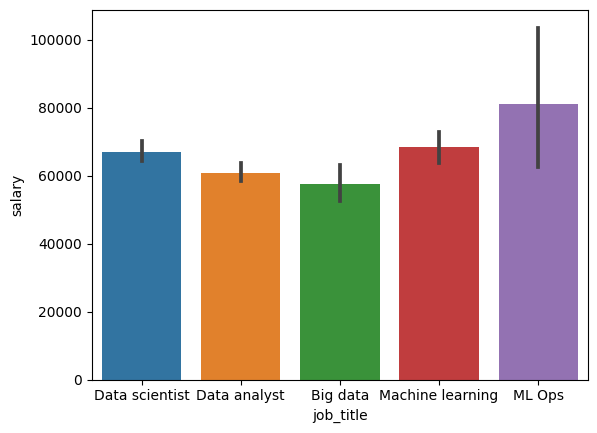

In [91]:
sns.barplot(x='job_title',y='salary', data=data)

Those in MLOPs are paid substantialy more than other similar fields

In [99]:
# The average payment in all fields in USD
data['salary'].mean().round(2)

64926.13

In [100]:
# The average payment in ML Ops field in USD
data[data['job_title']=='ML Ops']['salary'].mean().round(2)

81263.16

<Axes: xlabel='job_type', ylabel='salary'>

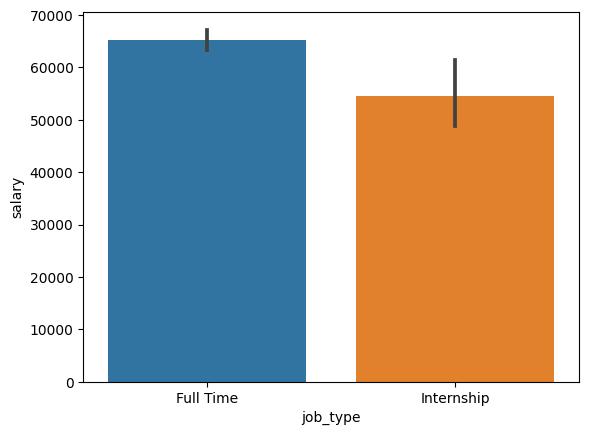

In [94]:
sns.barplot(x='job_type',y='salary', data=data)

<Axes: xlabel='experience_level', ylabel='salary'>

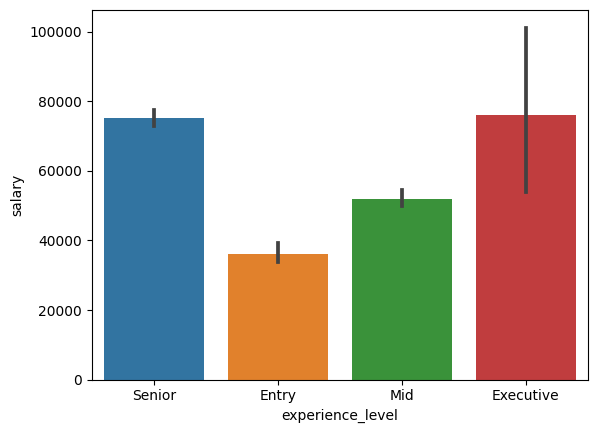

In [31]:
sns.barplot(x='experience_level',y='salary', data=data)

<Axes: xlabel='on-site', ylabel='salary'>

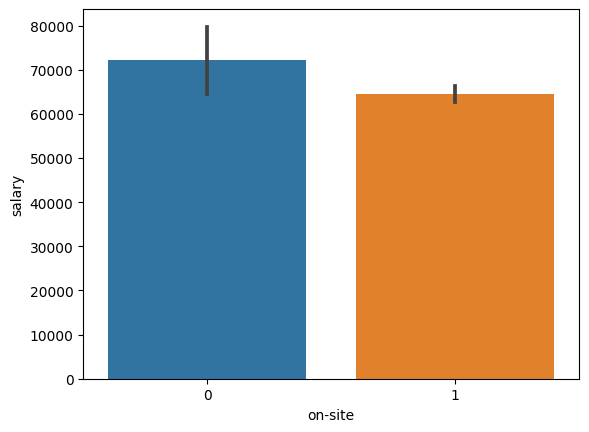

In [101]:
sns.barplot(x='on-site',y='salary', data=data)

### Encoding categorical variables

In [32]:
def catval(data,col):
    data[col]=data[col].astype('category').cat.codes
    return data[col]

In [33]:
data['job_title']=catval(data,'job_title')
data['job_type']=catval(data,'job_type')
data['experience_level']=catval(data,'experience_level')

In [34]:
data['job_title'].value_counts()

2    394
1    368
4    289
0    101
3     19
Name: job_title, dtype: int64

In [35]:
data['job_type'].value_counts()

0    1136
1      35
Name: job_type, dtype: int64

In [36]:
data['experience_level'].value_counts()

3    727
2    305
0    126
1     13
Name: experience_level, dtype: int64

In [37]:
data.head()

,job_title,job_type,experience_level,salary,on-site
0,2,0,3,149000.0,1
1,2,0,3,120000.0,1
2,2,0,3,68000.0,1
3,2,0,3,120000.0,1
4,2,0,3,149000.0,1


### Feature Engineering and model development

In [38]:
x=data.drop('salary',axis=1)
y=data['salary']

In [39]:
from sklearn.feature_selection import mutual_info_regression 

def make_mi_scores(x, y):
    mi_scores = mutual_info_regression(x, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x,y)
mi_scores[::3]

experience_level    0.603825
on-site             0.004590
Name: MI Scores, dtype: float64

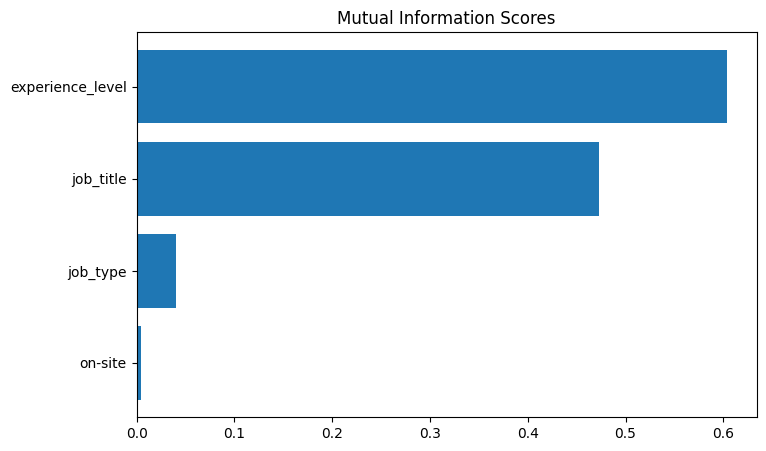

In [40]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

The columns which has most impact on the target are the experience level and job title

In [41]:
x=data.drop(['salary','on-site','job_type'],axis=1)
y=data['salary']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [43]:
model=LinearRegression()

In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
model.intercept_

26394.57148012666

In [47]:
model.coef_

array([ 2298.52300852, 13580.28367295])

In [48]:
mean_squared_error(y_test,y_pred)

1115533021.7436943